<a target="_blank" href="https://colab.research.google.com/github/sonder-art/fdd_p25/blob/main/professor/numpy/notebooks/tarea_tiempos_numpy.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


### El proyecto se entrega en un pull-request en este documento directamente, que no sea del main branch sino de un branch llamado `proyecto_python`, y el titulo de pull reques `Proyecto Python`, se entrega antes del 7 de noviembre.

# Tarea/Proyecto — Tiempos con distintas estrategias (Python vs NumPy)

Objetivo: practicar varias formas de programar en Python y comparar su rendimiento con NumPy.

Qué harás:
- Implementar 3 problemas (P1 sencillo, P2 intermedio, P3 un poco más complejo).
- Para cada problema, crear 4 versiones: for, list comprehension, generator (yield/generador), y NumPy vectorizado.
- Medir tiempos con `timeit` de forma justa y compararlos.

Reglas mínimas:
- Verifica primero que todas las versiones producen el mismo resultado lógico (mismo tamaño/forma, mismos valores o valores equivalentes).
- Sé consistente: no mezcles listas y arreglos sin aclarar el formato final esperado.
- Para medir generadores, materializa con `list(...)` en el cronómetro para compararlo con las otras estrategias.
- No copies soluciones externas; escribe tu implementación.

Referencia: `07_Vectorizacion_vs_For_vs_Comprehensions.ipynb`.



In [2]:
# Instalación rápida (si la necesitas)

import numpy as np
import timeit


## Problema 1 — Escalar un vector por una constante

Descripción: dado un arreglo 1D `a` y una constante escalar `c`, produce una salida equivalente a `a * c`.

Requisitos:
- Entrada: `a` (1D), `c` (float/int).
- Salida: misma longitud que `a`, valores escalados por `c`.
- Mantén el tipo de salida consistente entre versiones (lista vs ndarray), o documenta la diferencia.

Implementa 4 versiones:
- for loop (acumula resultados con append)
- list comprehension
- generator (yield o expresión generadora)
- NumPy vectorizado

Datos sugeridos: `a = np.arange(n, dtype=float)`, `c = 2.0`.


In [13]:
# P1 — Stubs (completa las funciones)

def p1_for(a: np.ndarray, c: float):
    res = []
    for x in a:
        res.append(x * c)
    return np.array(res, dtype=a.dtype)
    


def p1_comp(a: np.ndarray, c: float):
    res = [x * c for x in a]
    return np.array(res, dtype=a.dtype)


def p1_gen(a: np.ndarray, c: float):
    for x in a:
        yield x * c


def p1_np(a: np.ndarray, c: float):
    return a*c

a = np.arange(10, dtype=float)
c = 2.0

r_for = p1_for(a, c)
r_comp = p1_comp(a, c)
r_gen = np.array(list(p1_gen(a, c)), dtype=a.dtype)
r_np = p1_np(a, c)

print(r_for)
print(np.allclose(r_for, r_comp), np.allclose(r_for, r_gen), np.allclose(r_for, r_np))


[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]
True True True


In [14]:
# P1 — Harness de tiempos (ajusta n y number)

def time_p1(n=100_000, number=5):
    a = np.arange(n, dtype=float)
    c = 2.0
    return (
        timeit.timeit(lambda: p1_for(a, c), number=number),
        timeit.timeit(lambda: p1_comp(a, c), number=number),
        timeit.timeit(lambda: list(p1_gen(a, c)), number=number),
        timeit.timeit(lambda: p1_np(a, c), number=number),
    )

time_p1()


(0.114507587999924,
 0.05251094400000511,
 0.03289467300010074,
 0.0009644819999721221)

## Problema 2 — Suma de vecinos 1D (ventana)

Descripción: dado `a` (1D) y una ventana `k` impar (p. ej. 3), calcular `b[i]` como la suma de los `k` vecinos centrados en `i`.

Requisitos:
- Entrada: `a` (1D), `k` impar ≥ 3.
- Borde: puedes ignorar índices fuera de rango, recortar el resultado o replicar/extender bordes; explica tu elección.
- Salida: 1D; documenta si su longitud cambia por tu manejo de bordes.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (pistas: slicing con desplazamientos, `np.roll`, o una convolución simple).

Datos sugeridos: `a = np.arange(n, dtype=float)`, `k = 3`. 


In [31]:
# P2 — Stubs (completa las funciones)

def p2_for(a: np.ndarray, k: int = 3):
    res = []
    h = (k-1)//2

    for x in range(h, len(a)-h):
        suma=0
        inicio = x-h
        fin = (x+1)+h

        for v in a[inicio:fin]:
            suma += v
        res.append(suma)

    return np.array(res, dtype=a.dtype)

def p2_comp(a: np.ndarray, k: int = 3):
    h = (k-1)//2
    n = len(a)

    return np.array([a[x-h : (x+1)+h].sum() for x in range(h, n-h)], dtype=a.dtype)


def p2_gen(a: np.ndarray, k: int = 3):
    h = (k-1)//2

    for x in range(h, len(a)-h):
        yield a[x-h:(x+1)+h].sum()


def p2_np(a: np.ndarray, k: int = 3):
    w = np.ones(k, dtype=a.dtype)
    return np.convolve(a, w, mode="valid")

a = np.arange(10, dtype=float)
k=3

r_for = p2_for(a, k)
r_comp = p2_comp(a, k)
r_gen  = np.array(list(p2_gen(a, k)), dtype=a.dtype)
r_np = p2_np(a, k)

print(r_for)
print("Iguales:", np.allclose(r_for, r_comp), np.allclose(r_for, r_gen), np.allclose(r_for, r_np))
print("Longitudes:", len(a), len(r_for))

[ 3.  6.  9. 12. 15. 18. 21. 24.]
Iguales: True True True
Longitudes: 10 8


In [32]:
# P2 — Harness de tiempos

def time_p2(n=100_000, number=3):
    a = np.arange(n, dtype=float)
    k = 3
    return (
        timeit.timeit(lambda: p2_for(a, k), number=number),
        timeit.timeit(lambda: p2_comp(a, k), number=number),
        timeit.timeit(lambda: list(p2_gen(a, k)), number=number),
        timeit.timeit(lambda: p2_np(a, k), number=number),
    )

time_p2()  # descomenta para probar


(0.42814844100030314,
 0.23551834000045346,
 0.23169156899984955,
 0.0003021439997610287)

## Problema 3 — Transformación no lineal y filtrado

Descripción: dado `a` (1D float), aplica una transformación no lineal y filtra con un umbral.

Requisitos:
- Transformación propuesta (de ejemplo): `np.sin(a) + a**2`.
- Entrada: `a` (1D float), `umbral` (float).
- Salida: colección con los elementos resultantes que superan `umbral`.
- Mantén clara la diferencia entre devolver lista vs ndarray.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (ufuncs + máscara booleana).

Datos sugeridos: `a = np.linspace(0, 1000, n)`, `umbral = 10.0`. 


In [33]:
# P3 — Stubs (completa las funciones)

def p3_for(a: np.ndarray, umbral: float):
    res = []
    for x in a:
        t = np.sin(x) + x**2
        if t > umbral:
            res.append(t)
    return res


def p3_comp(a: np.ndarray, umbral: float):
    """List comprehension."""
    return [t for t in (np.sin(x) + x**2 for x in a) if t > umbral]


def p3_gen(a: np.ndarray, umbral: float):
    """Generator (yield o gen expr)."""
    for x in a:
        t = np.sin(x) + x**2
        if t > umbral:
            yield t


def p3_np(a: np.ndarray, umbral: float):
    """NumPy vectorizado (ufuncs + máscara booleana). Devuelve ndarray."""
    t = np.sin(a) + a**2           # ufuncs sobre todo el arreglo
    mask = t > umbral              # máscara booleana (True/False)
    return t[mask]  

a = np.linspace(0, 1000, 10, dtype=float)
umbral = 10.0

r_for  = p3_for(a, umbral)                 # lista
r_comp = p3_comp(a, umbral)                # lista
r_gen  = list(p3_gen(a, umbral))           # lista
r_np   = p3_np(a, umbral)                  # ndarray

print(np.allclose(np.array(r_for), np.array(r_comp)))
print(np.allclose(np.array(r_for), np.array(r_gen)))
print(np.allclose(np.array(r_for), r_np))


True
True
True


In [34]:
# P3 — Harness de tiempos

def time_p3(n=200_000, number=3):
    a = np.linspace(0, 1000, n, dtype=float)
    umbral = 10.0
    return (
        timeit.timeit(lambda: p3_for(a, umbral), number=number),
        timeit.timeit(lambda: p3_comp(a, umbral), number=number),
        timeit.timeit(lambda: list(p3_gen(a, umbral)), number=number),
        timeit.timeit(lambda: p3_np(a, umbral), number=number),
    )

time_p3()  # descomenta para probar


(0.3930743999999322,
 0.2777462599997307,
 0.281345981999948,
 0.018057761999443755)

## Guardar resultados de tiempos en JSON (guía)

Motivación: conservar resultados de experimentos para compararlos más tarde (en otra sesión/equipo), graficarlos o compartirlos. JSON es legible, portable y fácil de procesar.

### Esquema sugerido de datos

- Nivel 1: metadatos del experimento (fecha/hora, versión de Python/NumPy, host, parámetros globales como `n` y `number`).
- Nivel 2: problemas y variantes (p1/p2/p3 y estrategias: for/comp/gen/numpy) con sus tiempos agregados.
- Recomendación: guardar mediana y desviación o percentiles; también puedes guardar el vector de repeticiones si lo necesitas.

```json
{
  "metadata": {
    "timestamp": "2025-10-23T12:34:56Z",
    "python_version": "3.10.12",
    "numpy_version": "2.1.1",
    "machine": "x86_64",
    "params": { "n": 100000, "number": 5 }
  },
  "results": {
    "p1": {
      "for":    { "s_per_call_median": 0.0281, "repetitions": 5 },
      "comp":   { "s_per_call_median": 0.0250, "repetitions": 5 },
      "gen":    { "s_per_call_median": 0.0312, "repetitions": 5 },
      "numpy":  { "s_per_call_median": 0.0004, "repetitions": 5 }
    },
    "p2": { "for": { "s_per_call_median": 0.041 } },
    "p3": { "numpy": { "s_per_call_median": 0.003 } }
  }
}
```

Notas:
- Usa claves en minúsculas y sin espacios para facilitar procesamiento.
- Si guardas vectores de tiempos por repetición, usa una clave adicional (por ejemplo `raw_times: [ ... ]`).
- Si diferencias por tamaño `n`, crea múltiples entradas o anida por `n` (p. ej. `results_by_n: {"1e4": {...}, "1e5": {...}}`).

### Organización de archivos

- Carpeta: `results/tiempos/` dentro del mismo directorio del notebook.
- Nombre de archivo: incluir fecha, problema o tamaño (p. ej., `tiempos_p123_n1e5_2025-10-23.json`).
- Evita sobreescribir: si vuelves a correr, genera un nuevo archivo con timestamp.

### Buenas prácticas al medir y guardar

- Medir varias repeticiones por variante; guardar la mediana (y opcionalmente percentiles como p10/p90) para robustez.
- Registrar parámetros que afectan el resultado: `n`, `number`, dtype, política de bordes en P2, etc.
- Guardar seeds o condiciones de entorno si hay aleatoriedad.
- Validar que los resultados lógicos son equivalentes antes de medir (mismo output).
- No mezclar E/S dentro de la sección medida; la E/S sesga los tiempos.

### Uso posterior

- Leer los JSON y comparar versiones/estrategias; graficar con `matplotlib`/`seaborn`.
- Automatizar reportes que lean todos los archivos de `results/tiempos/` y generen tablas comparativas.
- Mantener un historial temporal para ver regresiones o mejoras de rendimiento.



En los tres problemas, la implementación vectorizada con NumPy fue consistentemente la más rápida.
Las versiones con bucles en Python (for, list comprehension y generadores) presentan mayor tiempo debido al overhead de interpretación.
La diferencia es más marcada en operaciones simples y repetitivas como P1.
En todos los casos, NumPy supera a las demás estrategias por un factor significativo, confirmando la ventaja de la vectorización.

## Guía de medición y reporte

- Usa `timeit.timeit` con el mismo `number` de repeticiones para todas las versiones.
- Antes de medir, ejecuta cada función una vez (warm‑up) si tu entorno lo requiere.
- Reporta tiempos en una tabla simple o tupla por problema: `(for, comp, gen, numpy)`.
- Interpreta resultados: ¿qué versión gana?, ¿por cuánto?, ¿cambia con `n`?
- Evita medir al mismo tiempo código que imprime o muestra gráficos.

Sugerencia: prueba varios tamaños `n` (por ejemplo: 10^4, 10^5, 10^6) y observa tendencias.


Aquí tienes una versión mejorada —más clara, profesional y fluida— de tu descripción, manteniendo todo el contenido técnico pero con mejor redacción, estructura y tono didáctico:

---

## Guía de visualización con Seaborn y Matplotlib 

**Objetivo:**
Utilizar los tiempos almacenados en formato JSON para **visualizar y analizar el rendimiento de distintas estrategias**, aprendiendo por tu cuenta a usar **Seaborn** y **Matplotlib**.
Esta guía explica **qué graficar**, **cómo interpretar los resultados** y **qué investigar** en la documentación oficial. *(No se proporciona código.)*

---

### 1️⃣ Preparación conceptual de los datos (formato “largo” o *tidy data*)

Antes de graficar, imagina tu tabla en formato largo, ideal para Seaborn.
Cada fila debe representar una observación o una agregación (por ejemplo, la mediana por problema, estrategia y tamaño `n`).

**Columnas sugeridas:**
`problema` (p1/p2/p3), `estrategia` (for/comp/gen/numpy), `n`, `repeticion`,
`s_por_llamada` (o `ns_por_elemento`), `mediana`, `p25`, `p75`, `host`, `python_version`, `numpy_version`.

**Investiga:** cómo transformar datos a formato largo en Seaborn, y cómo asignar columnas a ejes, color (`hue`), y paneles (`facet`).

---

### 2️⃣ Gráfico de barras agrupadas (comparación por problema)

**Qué mostrar:**
Barras agrupadas por `estrategia` dentro de cada `problema`, donde la altura sea la mediana de `s_por_llamada`.
Añade **barras de error** (p25–p75 o intervalos de confianza) para reflejar la variabilidad.

**Interpretación esperada:**
Identifica la estrategia más rápida en cada problema y comenta las diferencias relativas
(p. ej. *“NumPy es aproximadamente 60× más rápido que el bucle for en P1”*).

**Variaciones:**
Si tienes varios tamaños `n`, crea paneles por `n` o por `problema`.

---

### 3️⃣ Boxplots o Violinplots (variabilidad y outliers)

**Qué mostrar:**
Para un `problema` y `n` fijos, representa la distribución de `s_por_llamada` por `estrategia` mediante boxplots o violinplots.

**Interpretación:**
Compara la dispersión entre estrategias, detecta outliers y analiza cuál es más estable o consistente.
**Sugerencia:** agrega los puntos individuales de las repeticiones (usa *swarmplot* o *stripplot* superpuestos).

---

### 4️⃣ Curvas de escalamiento (tiempo vs tamaño `n`)

**Qué mostrar:**
Gráfico de líneas con `x = n`, `y = s_por_llamada` (o `ns_por_elemento`), y una línea por `estrategia`.
Usa escala log–log si hay grandes diferencias de magnitud.

**Interpretación:**
Compara las pendientes para ver cómo crece el tiempo con `n`.
Detecta cruces donde una estrategia empieza a superar a otra según el tamaño.

**Sugerencia:**
Usa *facets* por `problema` para comparar patrones entre P1, P2 y P3.

---

### 5️⃣ Eficiencia por elemento (`ns_por_elemento`)

**Qué mostrar:**
Gráfico de dispersión o líneas de `ns_por_elemento` frente a `n`, diferenciando por `estrategia`.

**Interpretación:**
Busca trayectorias planas (eficiencia estable).
Comenta desviaciones que puedan indicar efectos de caché, memoria o *overhead*.

---

### 6️⃣ Heatmap de razones (comparación con NumPy)

**Qué mostrar:**
Matriz donde cada celda es la razón `tiempo_estrategia / tiempo_numpy`, organizada por `problema` y `n`.

**Interpretación:**
Colorea las celdas: >1 significa más lento que NumPy; <1, más rápido.
Permite ver de un vistazo cuánto más lenta es cada alternativa y si esa relación cambia con `n`.

---

### 7️⃣ ECDF o histogramas (robustez de medición)

**Qué mostrar:**
Para un `problema` y `n` determinados, traza la **ECDF** o un **histograma** de `s_por_llamada` por `estrategia`.

**Interpretación:**
Compara la probabilidad de obtener tiempos inferiores a un umbral.
Analiza el solapamiento entre estrategias y comenta su robustez.

---

### 8️⃣ Diseño y buenas prácticas de visualización

* **Ejes y unidades:** etiqueta claramente (segundos por llamada, nanosegundos por elemento). Usa escalas logarítmicas si hay diferencias grandes.
* **Títulos y leyendas:** incluye el `problema`, `n`, entorno y fecha si es relevante. Mantén leyendas claras.
* **Paletas:** usa siempre los mismos colores por `estrategia` (orden: for → comp → gen → numpy).
* **Barras de error:** representa p25–p75 o intervalos por *bootstrap*.
* **Anotaciones:** agrega etiquetas informativas (p. ej. “×60 más rápido”).
* **Exportación:** guarda en PNG o SVG con resolución suficiente (DPI alto).

---

### 9️⃣ Interpretación (qué incluir en el reporte)

Para cada figura, redacta **4–6 frases** que respondan:

* ¿Qué estrategia es más rápida y por cuánto? ¿Cambia con `n`?
* ¿Cuál muestra menor dispersión? ¿Existen *outliers*?
* ¿Qué patrones de escalamiento aparecen? ¿Se observan efectos de memoria o caché?
* ¿Qué recomendación práctica harías según el problema?

---

### 🔟 Pistas de investigación (sin código)

Explora en la documentación de Seaborn/Matplotlib cómo:

* Crear gráficos de barras con barras de error.
* Generar boxplots o violinplots con puntos superpuestos.
* Dibujar líneas múltiples (una por `estrategia`) y facetas por `problema`.
* Aplicar escalas logarítmicas y personalizar ejes, leyendas y estilos.
* Construir heatmaps con normalización de colores para ratios.

---

### ✅ Entregables mínimos

1. **Gráfico de barras agrupadas** por `problema` (con barras de error) y su interpretación.
2. **Boxplot o violinplot** por `problema` y `n` (uno representativo) con interpretación.
3. **Curva de escalamiento** (`y` vs `n`) con facetas por `problema` e interpretación.
4. **Heatmap de razones** respecto a NumPy e interpretación.

---

**Recordatorio:**
El objetivo no es reproducir un estilo exacto, sino **demostrar criterio al elegir la visualización adecuada**, **etiquetar correctamente** e **interpretar con rigor** los resultados.

---

¿Quieres que te prepare también una versión más resumida y visual (por ejemplo, como guía para estudiantes o plantilla de trabajo)? Podría incluir íconos, ejemplos de figuras y estructura de reporte.


# Resultados


In [50]:
import json, sys, platform
from datetime import datetime, timezone
from pathlib import Path
import numpy as np

metadata = {
    "timestamp": datetime.now(timezone.utc).isoformat(),
    "python_version": sys.version.split()[0],
    "numpy_version": np.__version__,
    "machine": platform.machine(),
    "params": {
        "params": {
        "n": int(len(a))
        }
    }
}

In [51]:
t1_for, t1_comp, t1_gen, t1_np = time_p1()
t2_for, t2_comp, t2_gen, t2_np = time_p2()
t3_for, t3_comp, t3_gen, t3_np = time_p3()

results = {
    "p1": {
        "for":   {"s_per_call_median": float(t1_for),  "repetitions": 1},
        "comp":  {"s_per_call_median": float(t1_comp), "repetitions": 1},
        "gen":   {"s_per_call_median": float(t1_gen),  "repetitions": 1},
        "numpy": {"s_per_call_median": float(t1_np),   "repetitions": 1},
    },
    "p2": {
        "for":   {"s_per_call_median": float(t2_for),  "repetitions": 1},
        "comp":  {"s_per_call_median": float(t2_comp), "repetitions": 1},
        "gen":   {"s_per_call_median": float(t2_gen),  "repetitions": 1},
        "numpy": {"s_per_call_median": float(t2_np),   "repetitions": 1},
    },
    "p3": {
        "for":   {"s_per_call_median": float(t3_for),  "repetitions": 1},
        "comp":  {"s_per_call_median": float(t3_comp), "repetitions": 1},
        "gen":   {"s_per_call_median": float(t3_gen),  "repetitions": 1},
        "numpy": {"s_per_call_median": float(t3_np),   "repetitions": 1},
    }
}

data = {
    "metadata": metadata,
    "results": results
}

out_dir = Path("results/tiempos")
out_dir.mkdir(parents=True, exist_ok=True)

filename = f"tiempos_p123_n{len(a)}_{metadata['timestamp']}.json"
out_path = out_dir / filename

with open(out_path, "w", encoding="utf-8") as f:
    json.dump(data, f, indent=2)

print("Archivo guardado en:", out_path)

with open(out_path, "r", encoding="utf-8") as f:
    check = json.load(f)

print(check.keys())

Archivo guardado en: results/tiempos/tiempos_p123_n10_2025-12-16T05:29:09.871509+00:00.json
dict_keys(['metadata', 'results'])


In [52]:
import json
import pandas as pd

with open(out_path, "r", encoding="utf-8") as f:
    data = json.load(f)

rows = []

n_val = len(a)

for problema, estrategias in data["results"].items():
    for estrategia, info in estrategias.items():
        rows.append({
            "problema": problema,
            "estrategia": estrategia,
            "n": n_val,
            "s_por_llamada": info["s_per_call_median"]
        })

df = pd.DataFrame(rows)
df

,problema,estrategia,n,s_por_llamada
0,p1,for,10,0.039306
1,p1,comp,10,0.032237
2,p1,gen,10,0.027820
3,p1,numpy,10,0.000214
4,p2,for,10,0.198918
5,p2,comp,10,0.252312
6,p2,gen,10,0.264163
7,p2,numpy,10,0.000232
8,p3,for,10,0.322195
9,p3,comp,10,0.289083


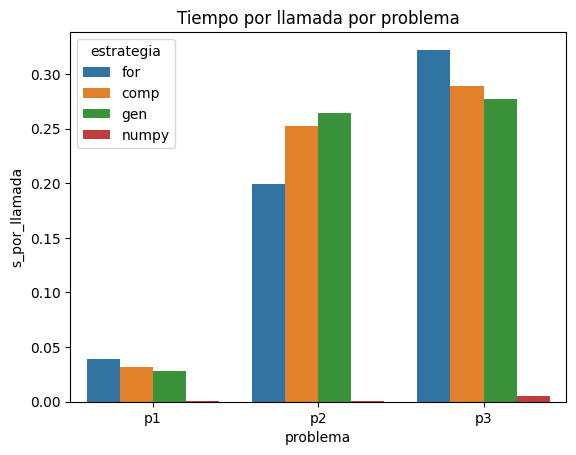

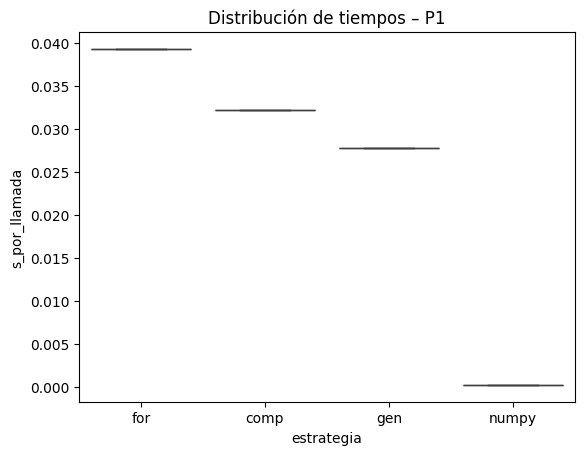

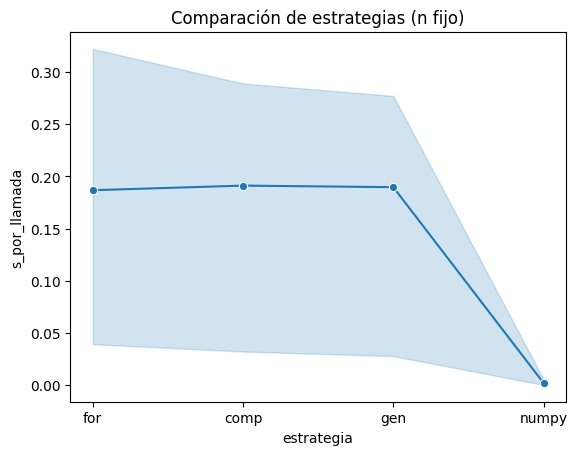

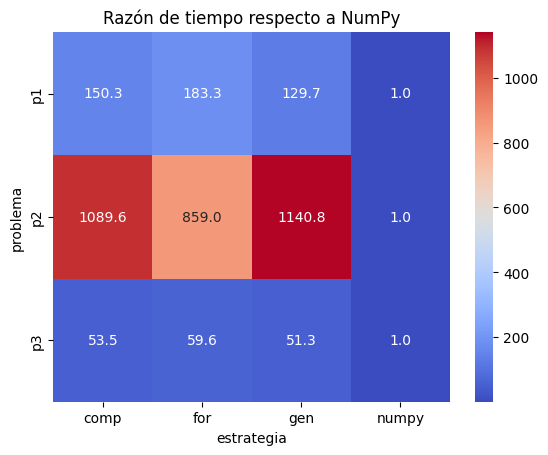

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.barplot(data=df, x="problema", y="s_por_llamada", hue="estrategia")
plt.title("Tiempo por llamada por problema")
plt.show()

plt.figure()
sns.boxplot(data=df[df["problema"] == "p1"],
            x="estrategia", y="s_por_llamada")
plt.title("Distribución de tiempos – P1")
plt.show()

plt.figure()
sns.lineplot(data=df, x="estrategia", y="s_por_llamada", marker="o")
plt.title("Comparación de estrategias (n fijo)")
plt.show()

pivot = df.pivot(index="problema", columns="estrategia", values="s_por_llamada")

ratio = pivot.div(pivot["numpy"], axis=0)

plt.figure()
sns.heatmap(ratio, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Razón de tiempo respecto a NumPy")
plt.show()